# **SHELFIFY - AN EMPTY SPACE DETECTION MODEL**


In [ ]:
#Installing and importing all the necessary packages
!pip install ultralytics==8.0.20 #Package used for object detection and classification
!pip install roboflow --quiet #Package used to manage datasets, annotations and augmentations
from IPython import display #Interactive Python
display.clear_output()
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from IPython.display import display, Image
!pip install -U albumentations==1.3.0

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/107.7 GB disk)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 kB 8.9 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.15
    Uninstalling albumentations-1.4.15:
      Successfully uninstalled albumentations-1.4.15


In [ ]:
import os #os module used to interact with the operating system in Python
HOME = os.getcwd()
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


In [ ]:
#dataset importing from roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="8B5TfIVBUCxvAsWWsNqX")
project = rf.workspace("dsjourney").project("empty-spaces-detection-in-shelf-data")
dataset = project.version(2).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Empty-Spaces-Detection-in-Shelf-Data-2 in yolov5pytorch:: 100%|██████████| 1450/1450 [00:00<00:00, 1939.12it/s]


In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=80

/content
100% 21.5M/21.5M [00:00<00:00, 88.0MB/s]

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return 

/content


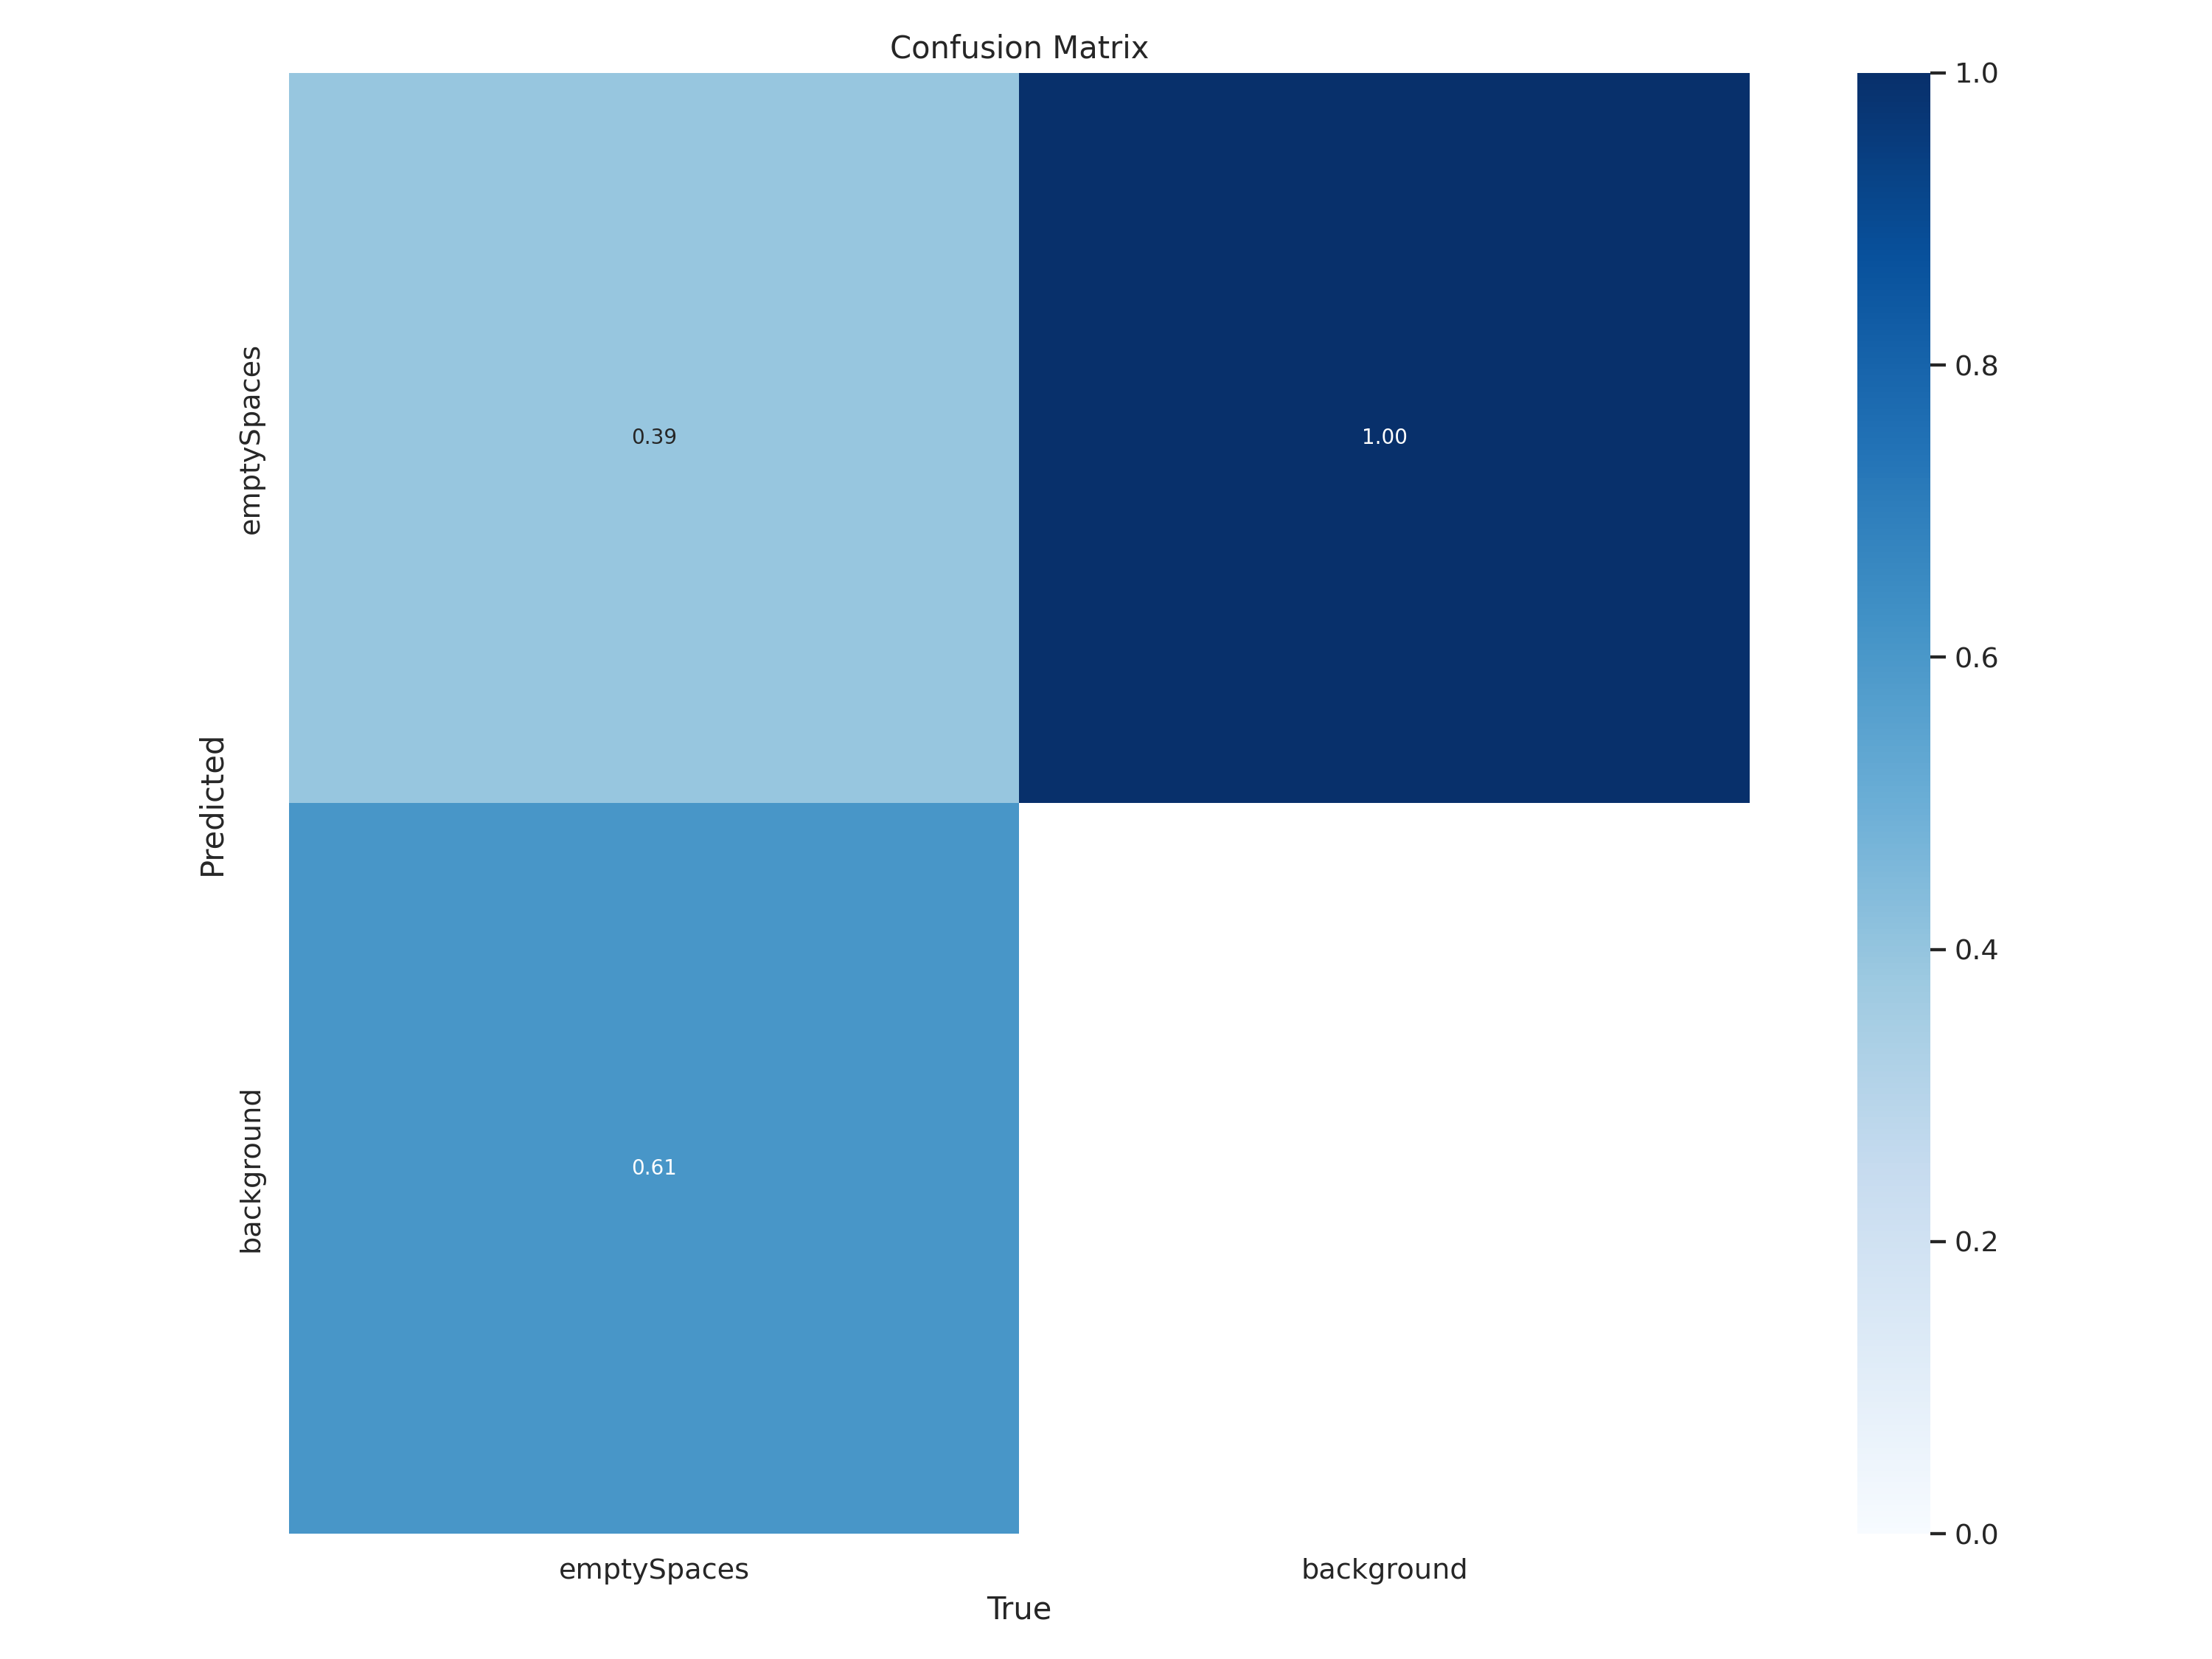

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1000)

/content


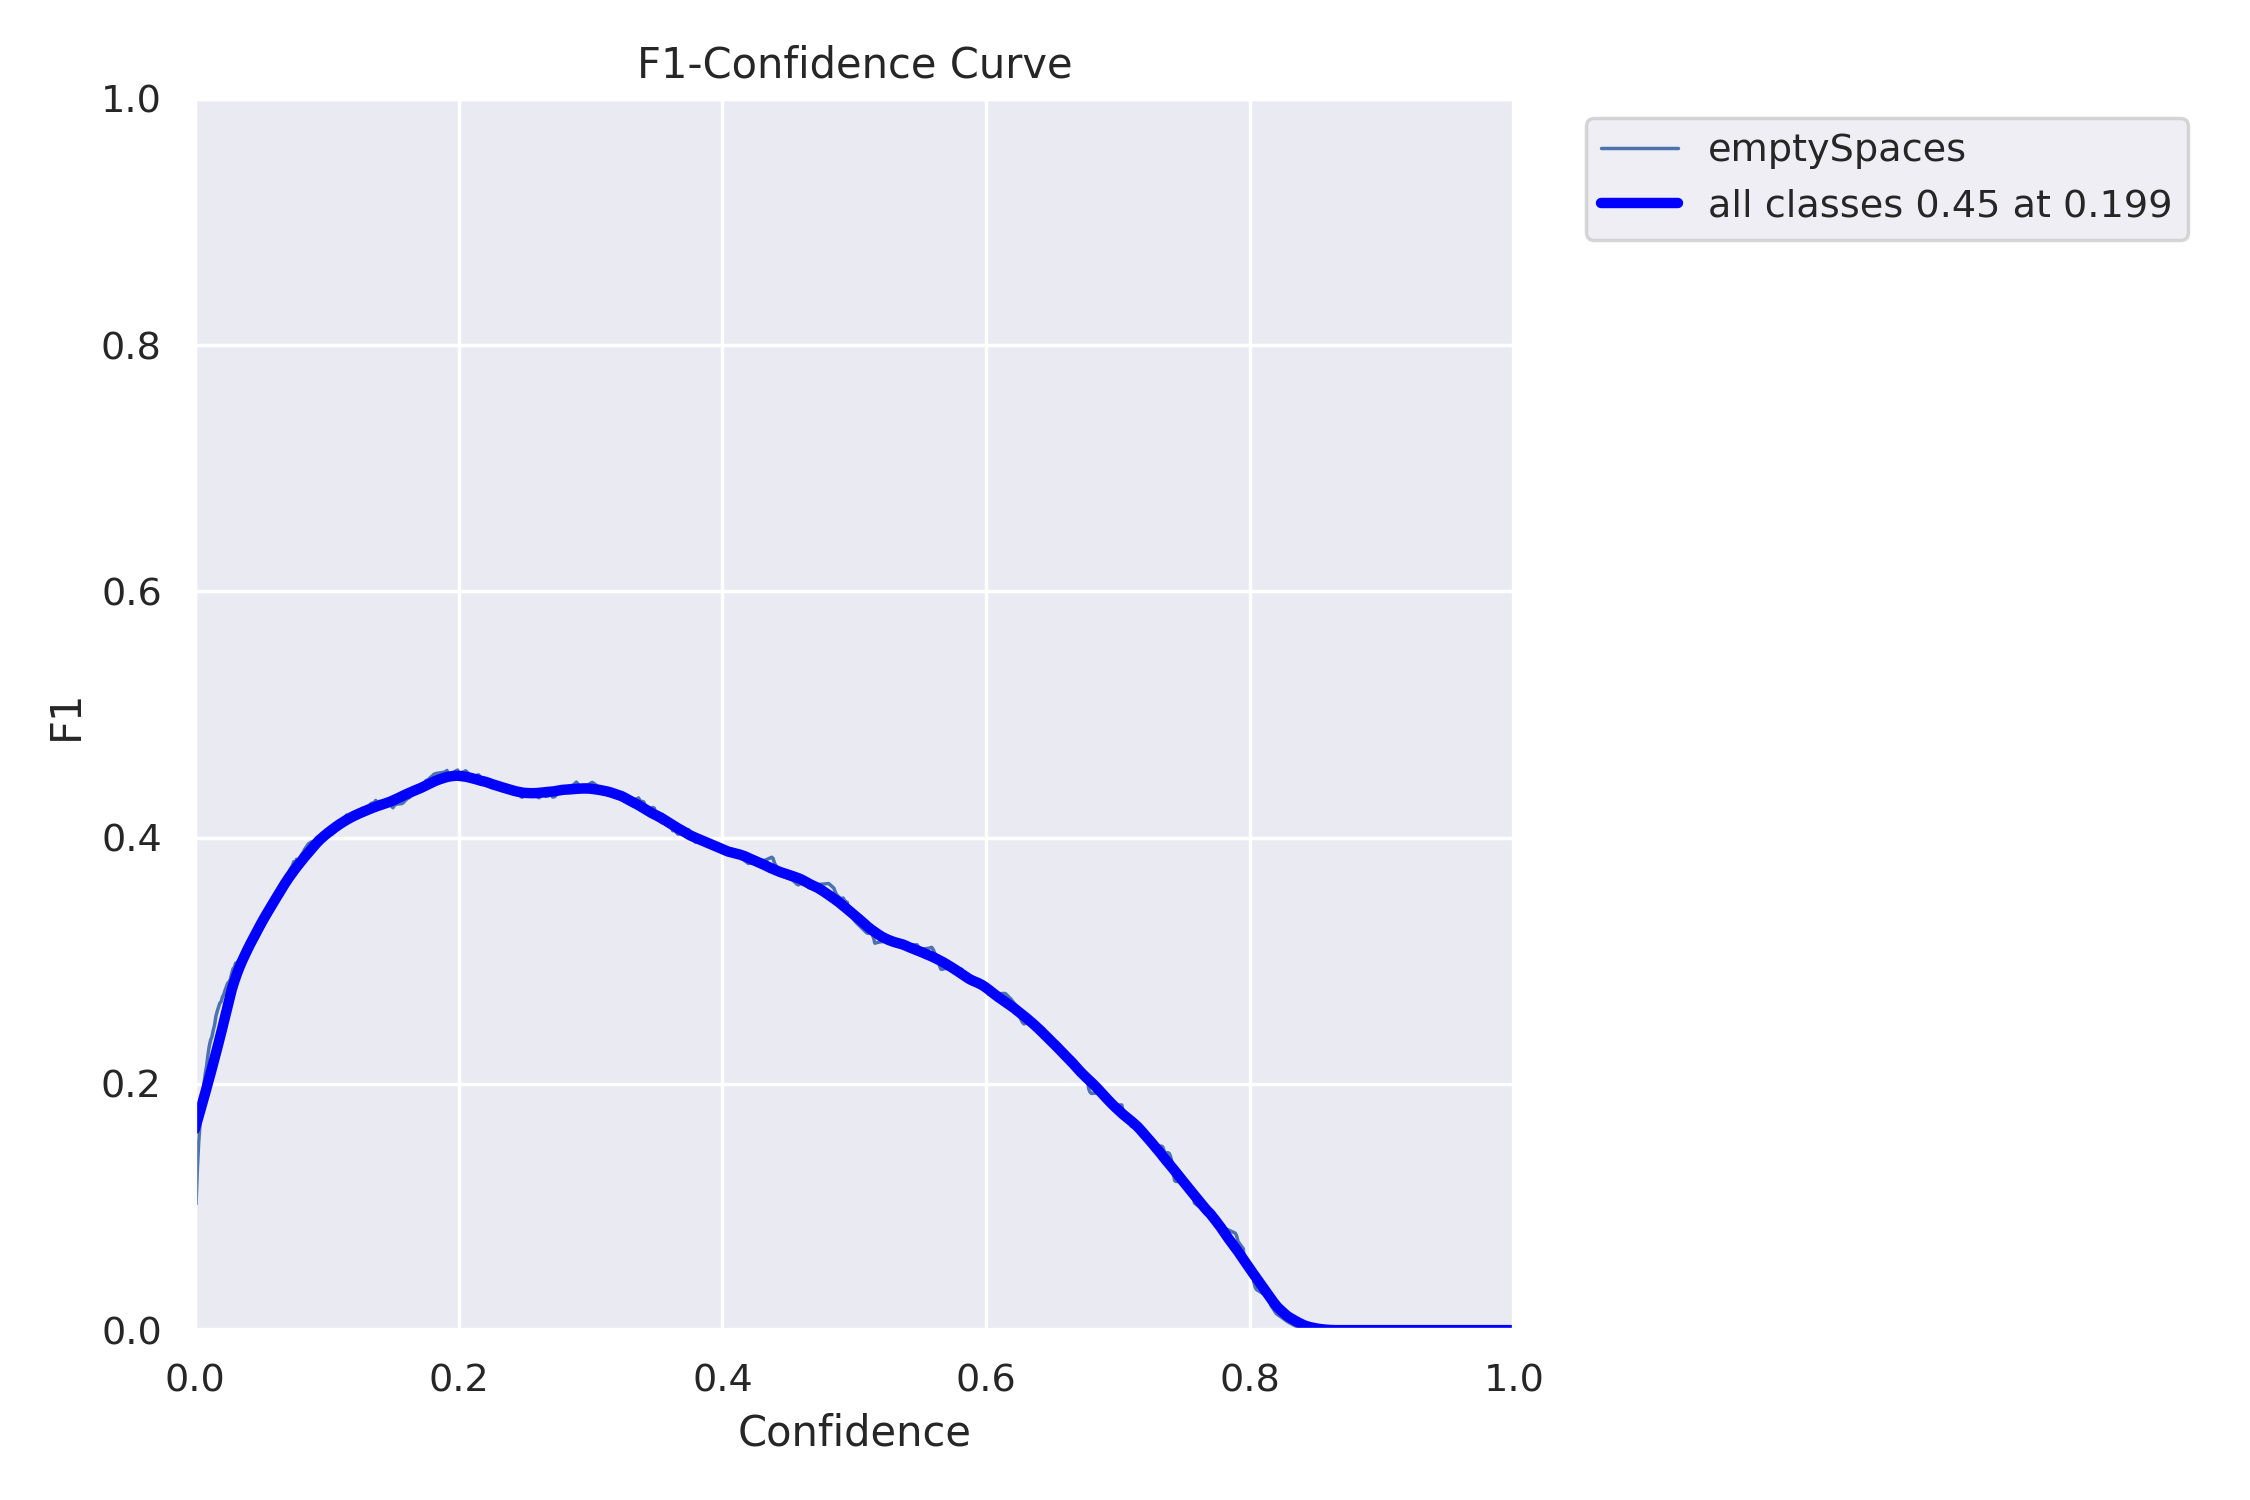

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=1000)

/content


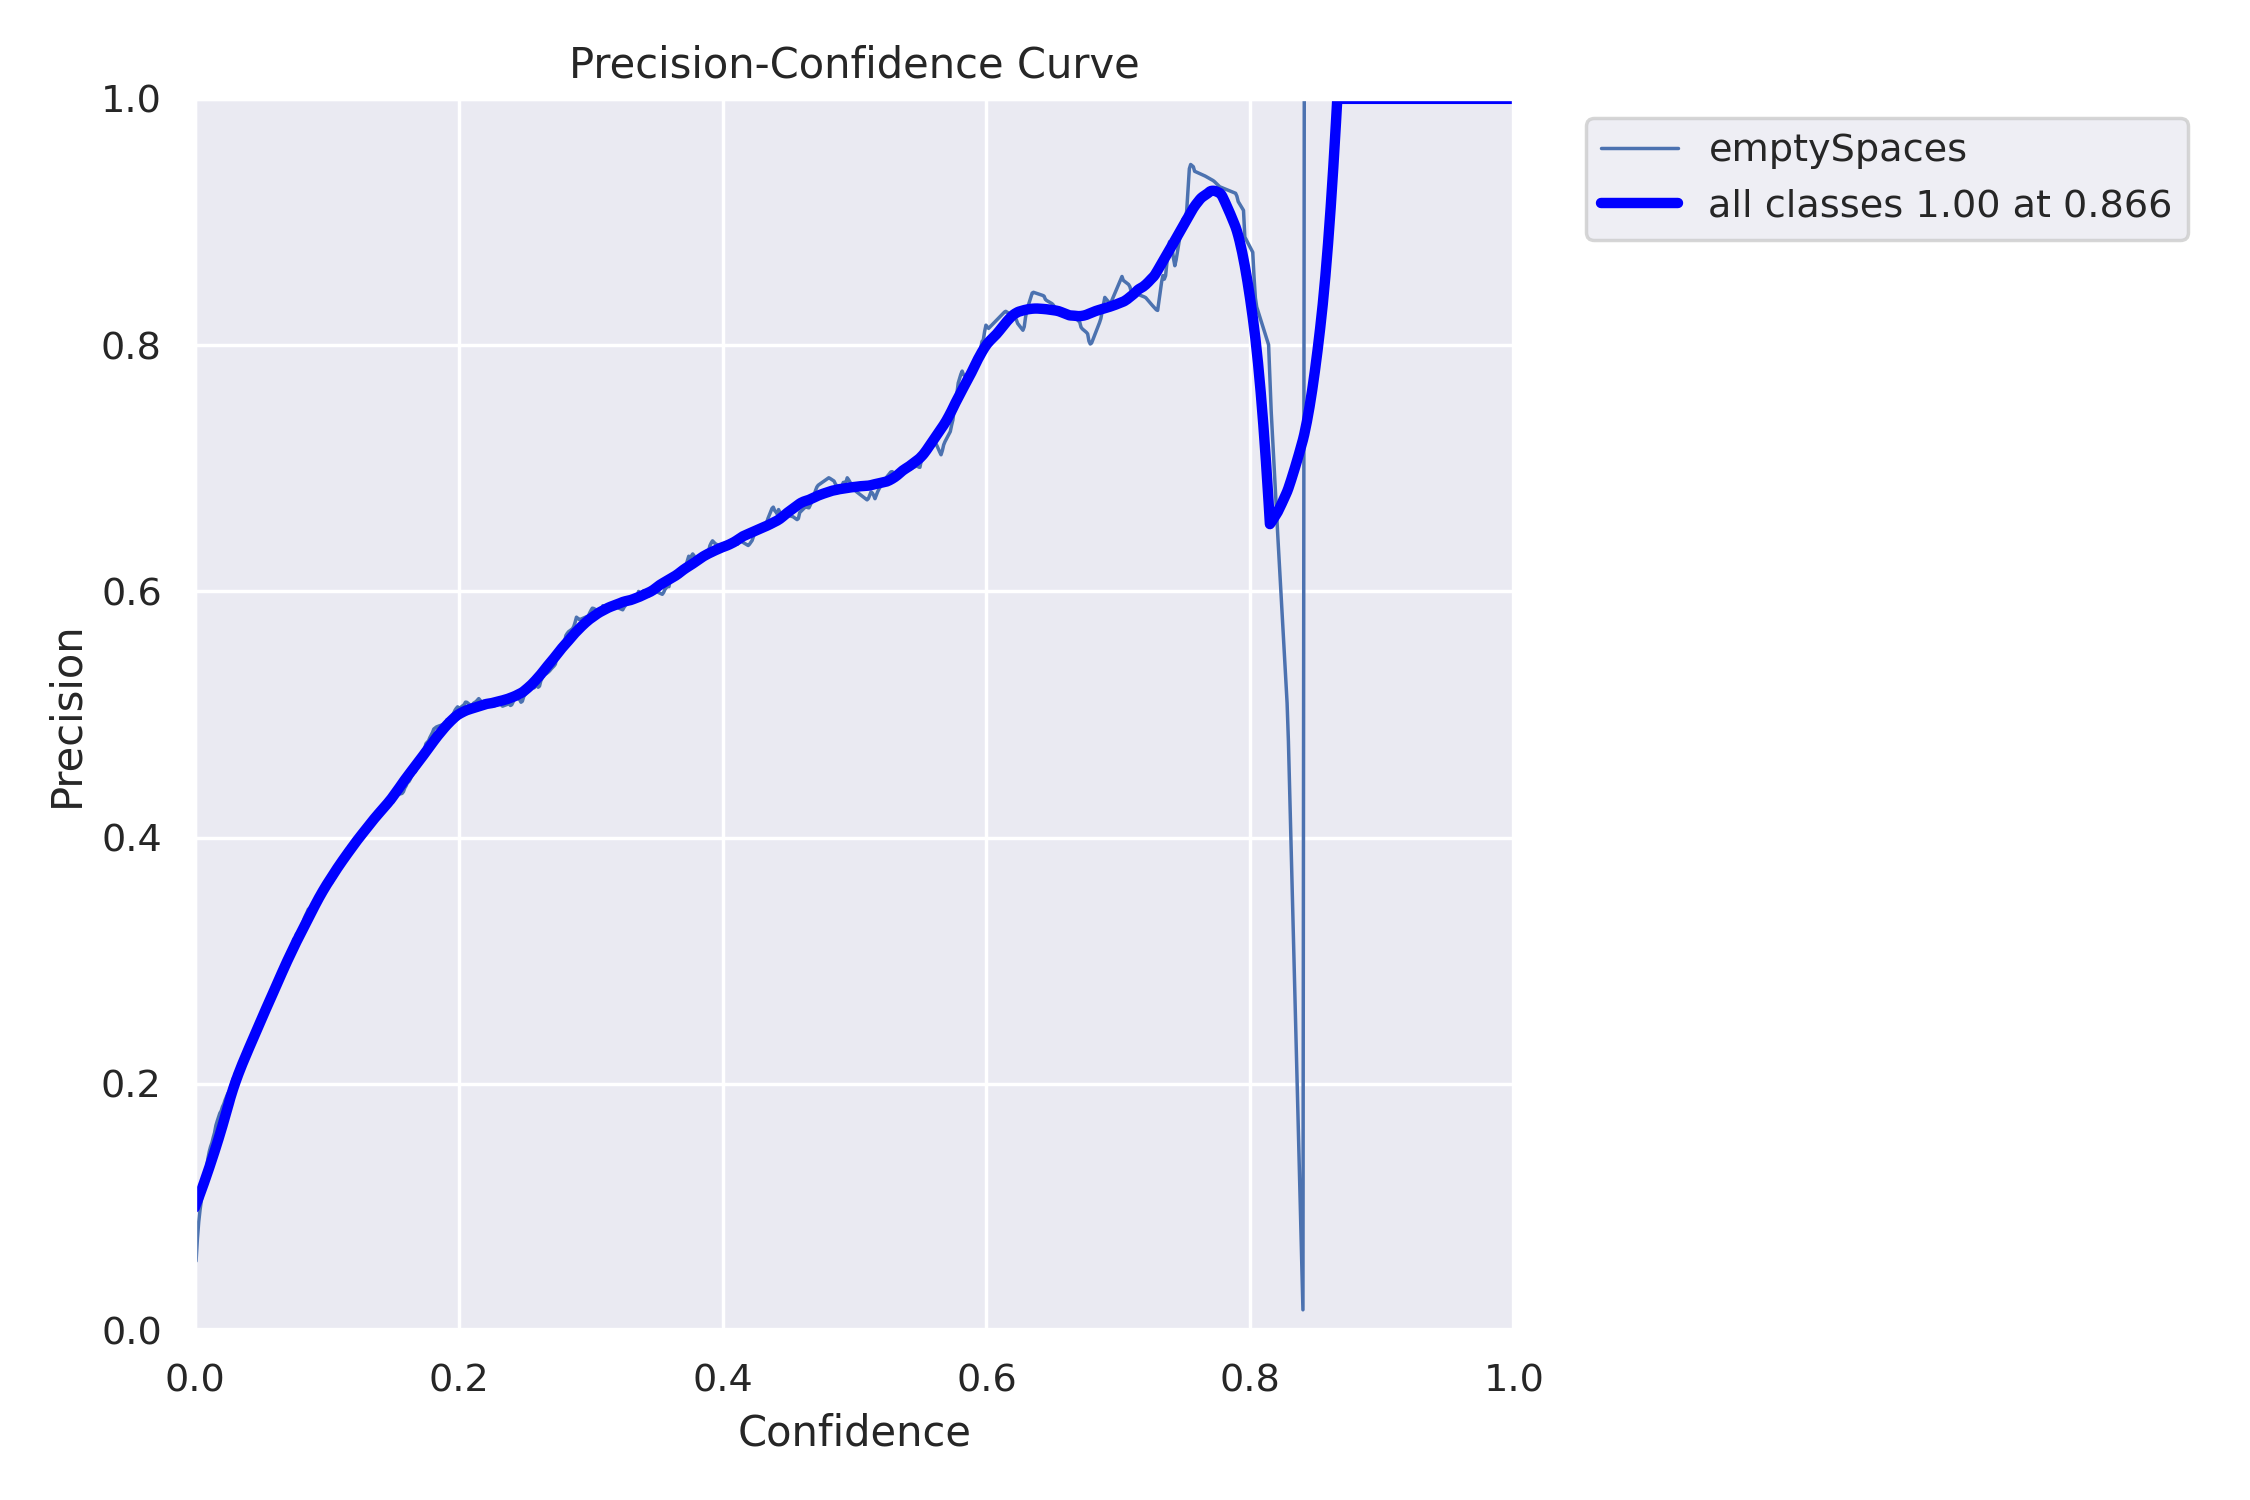

In [ ]:
 %cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/P_curve.png', width=1000)

/content


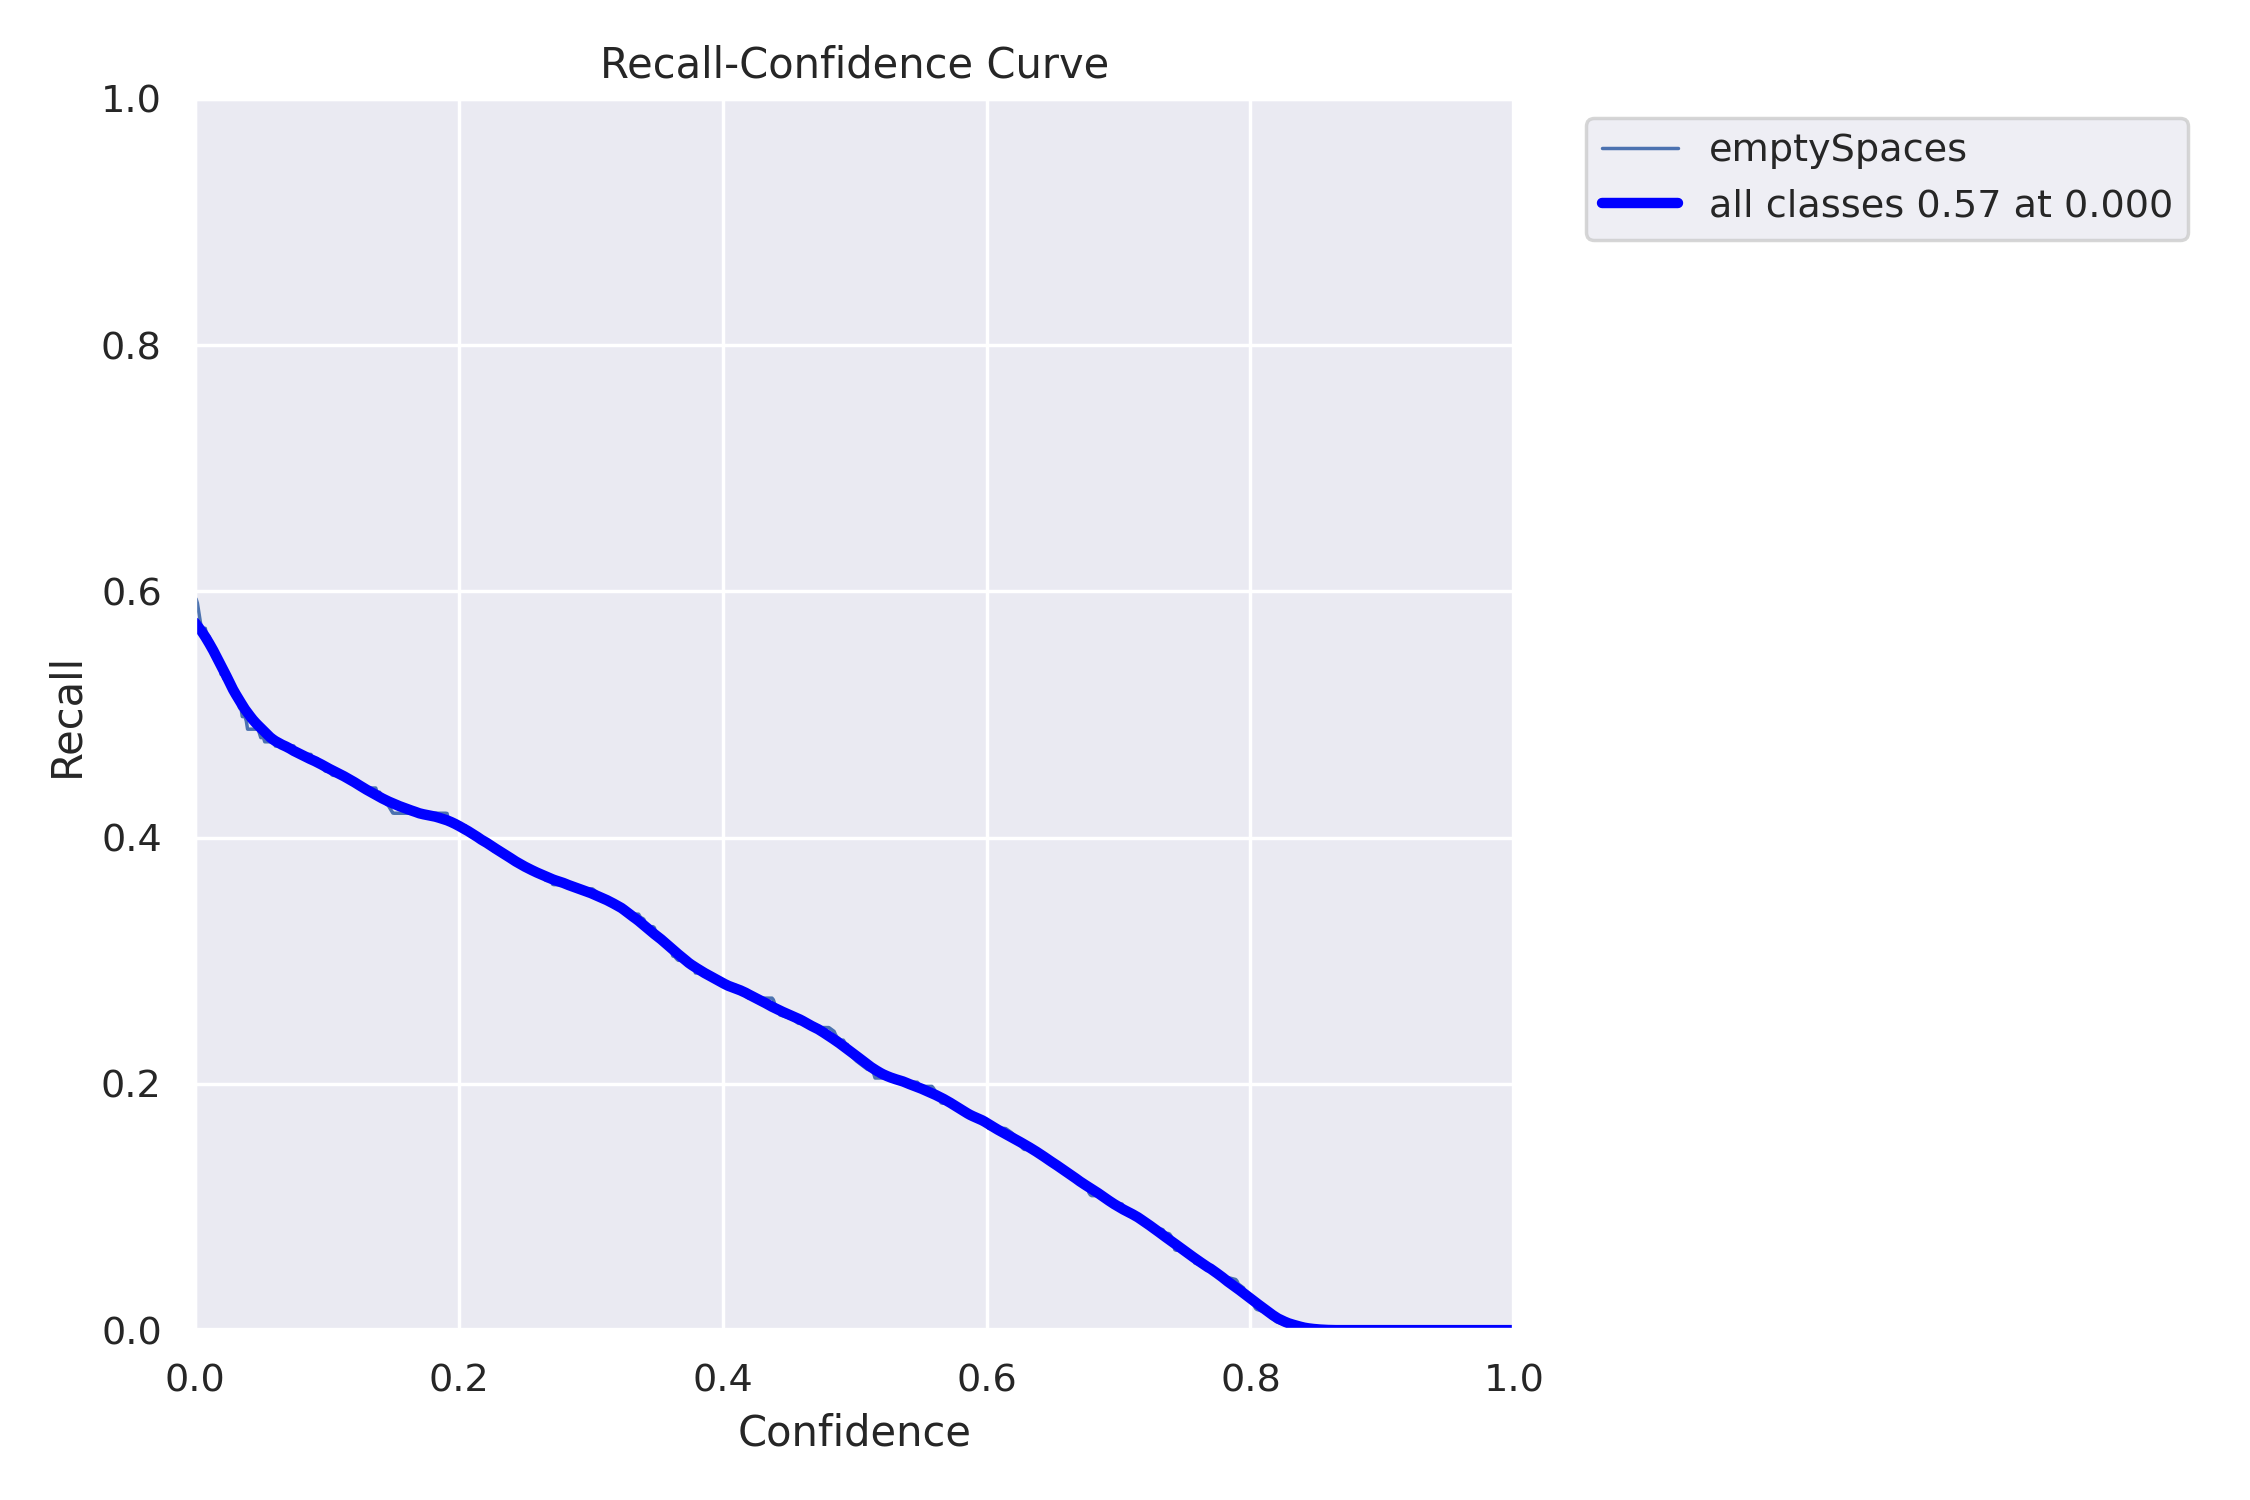

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/R_curve.png', width=1000)

Index(['                  epoch', '         train/box_loss',
       '         train/cls_loss', '         train/dfl_loss',
       '   metrics/precision(B)', '      metrics/recall(B)',
       '       metrics/mAP50(B)', '    metrics/mAP50-95(B)',
       '           val/box_loss', '           val/cls_loss',
       '           val/dfl_loss', '                 lr/pg0',
       '                 lr/pg1', '                 lr/pg2'],
      dtype='object')


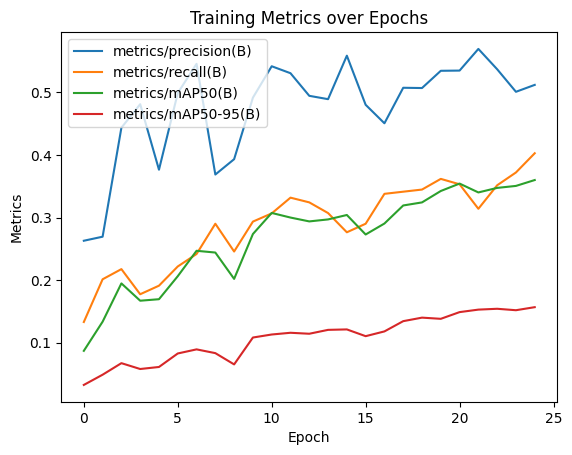

In [ ]:
'''!pip install pandas matplotlib
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
csv_path = '/content/runs/detect/train/results.csv'
df = pd.read_csv(csv_path)

# Print column names to check for any unexpected issues
print(df.columns)

# Strip any whitespace characters from column names
df.columns = df.columns.str.strip()

# Now plot the metrics with corrected column names
df.plot(x='epoch',
        y=['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)'],
        kind='line')

# Add labels and title to the plot
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.title('Training Metrics over Epochs')

# Save the plot as a PNG file
plt.savefig('/content/runs/detect/train/results.png')'''

In [ ]:
 %cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.6 source={dataset.location}/test/images save=True


/content
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu')  # lo

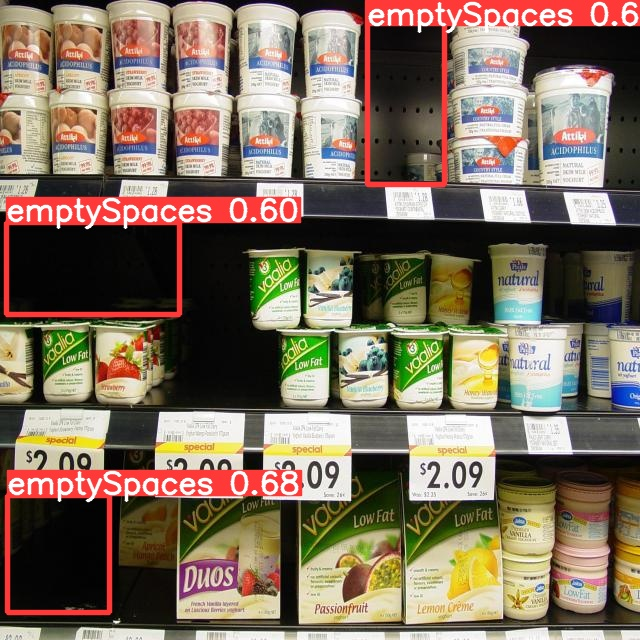

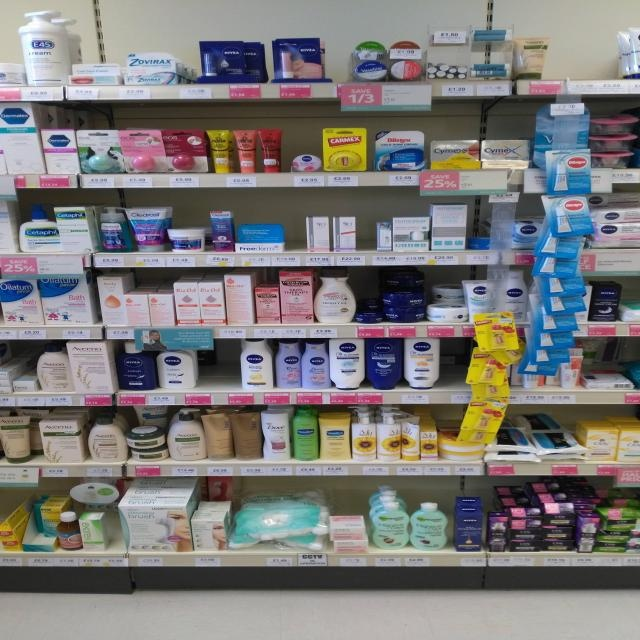

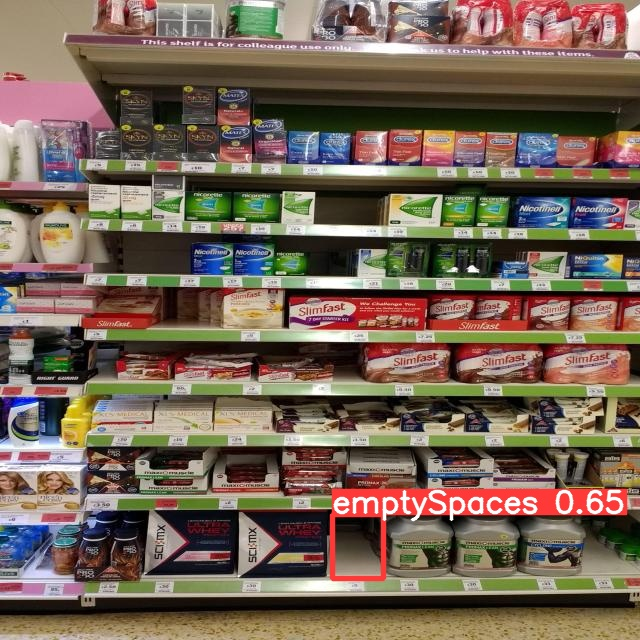

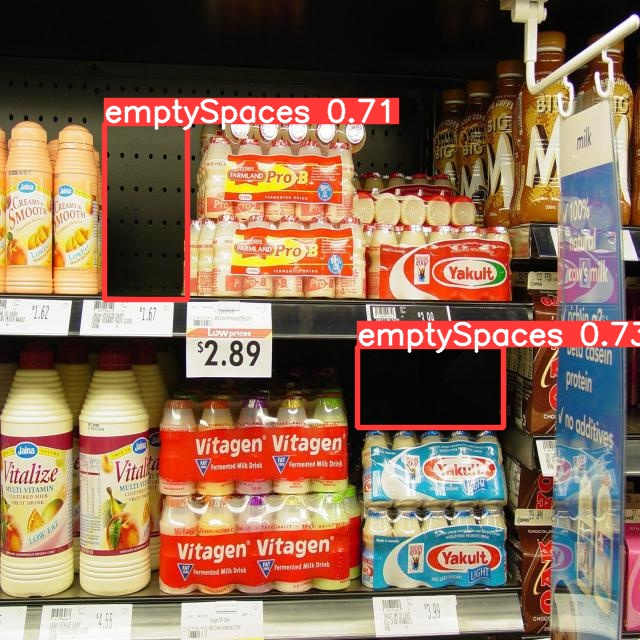

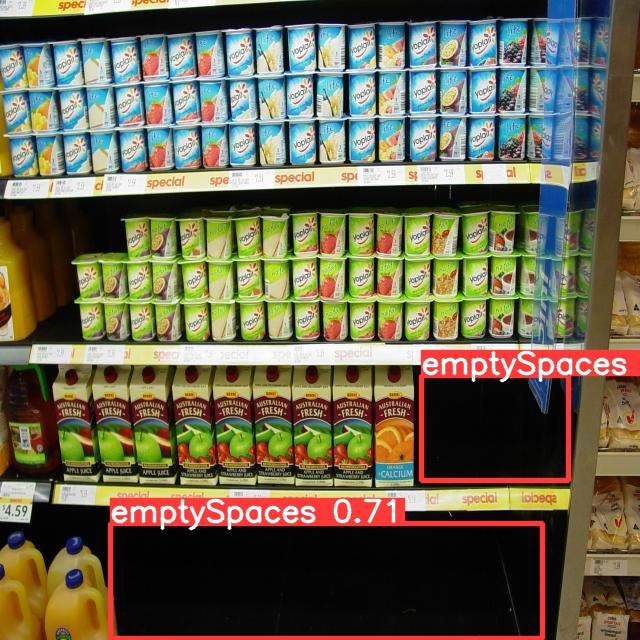

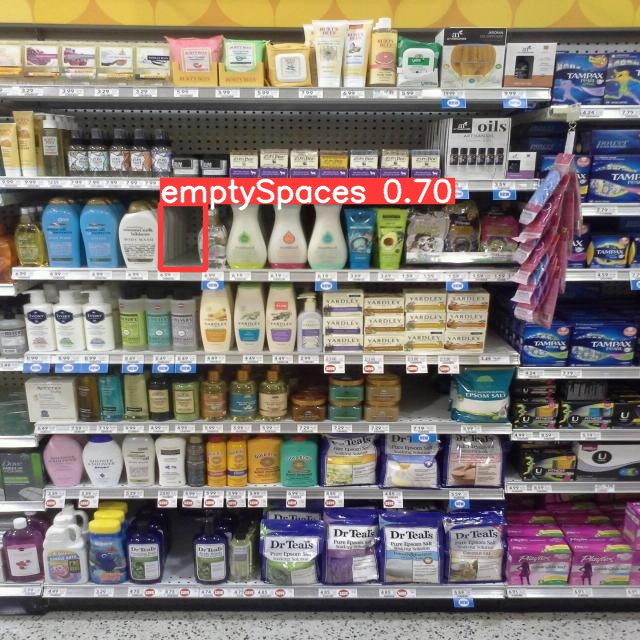

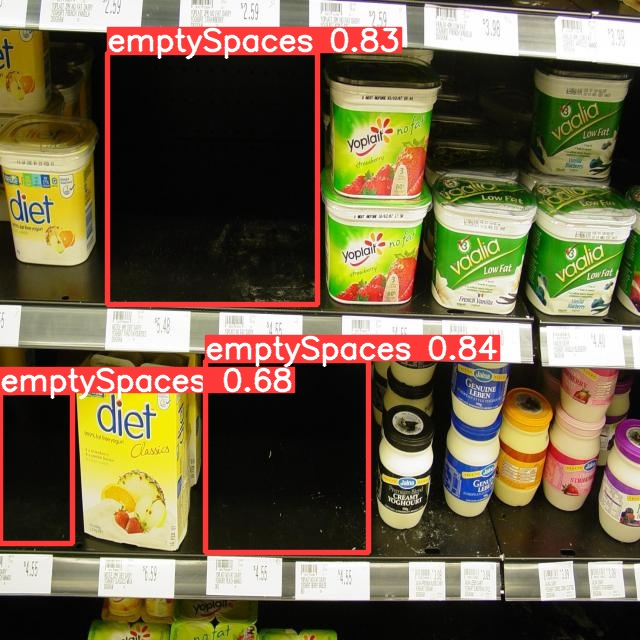

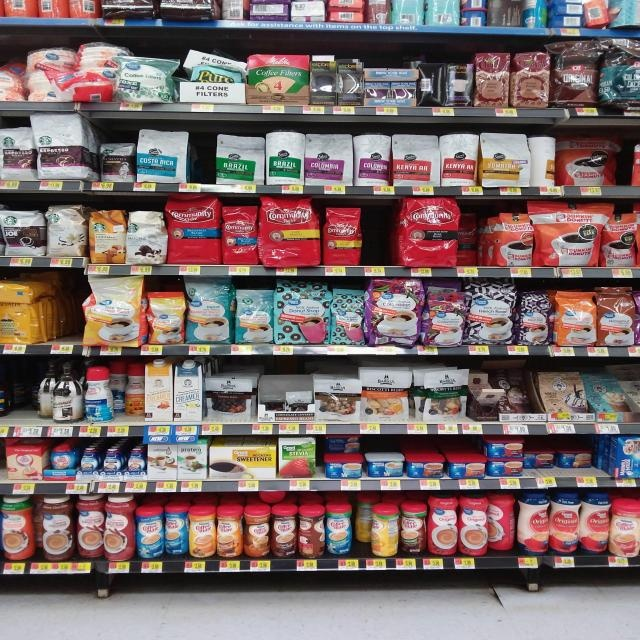

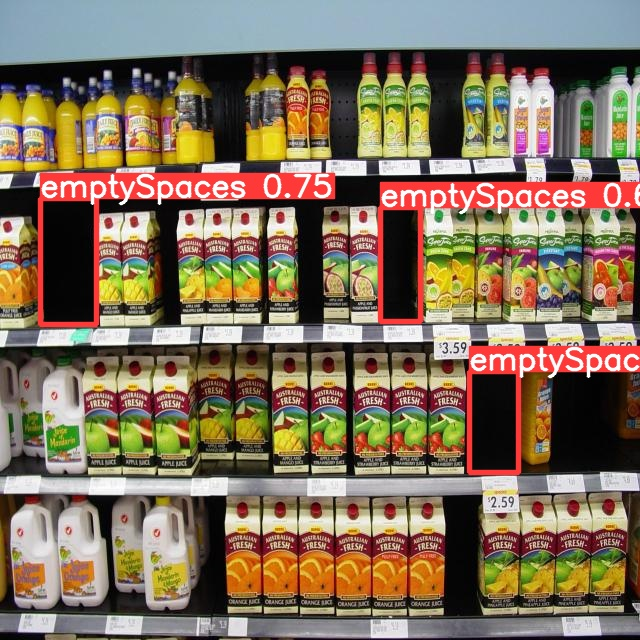

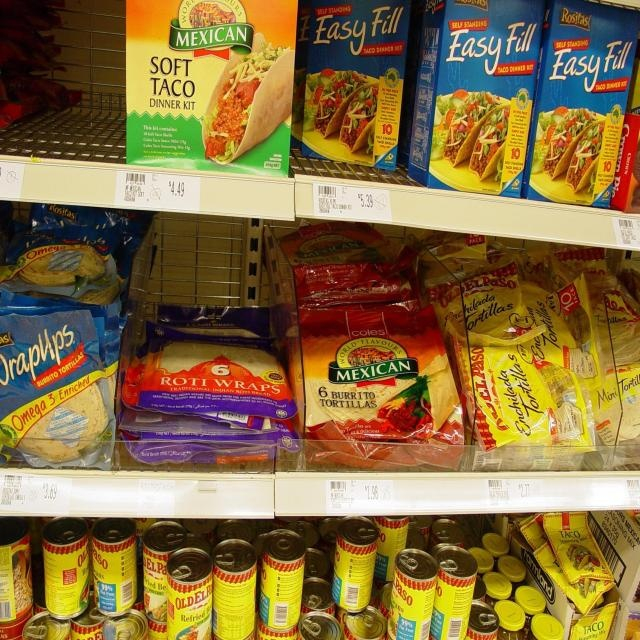

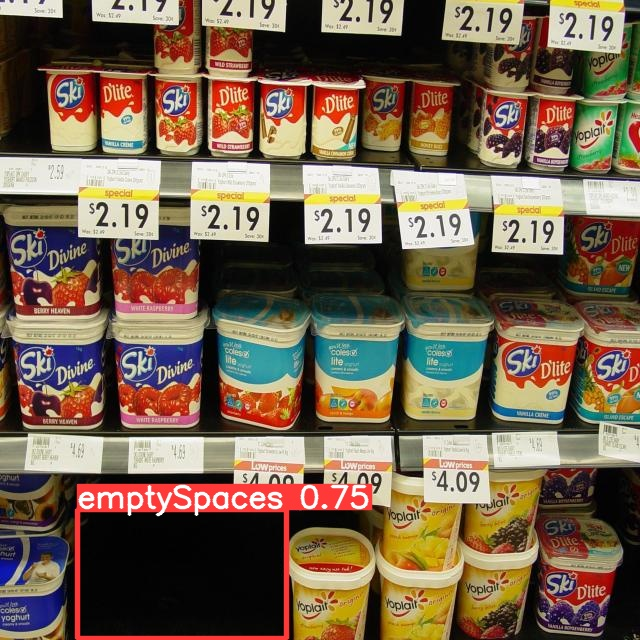

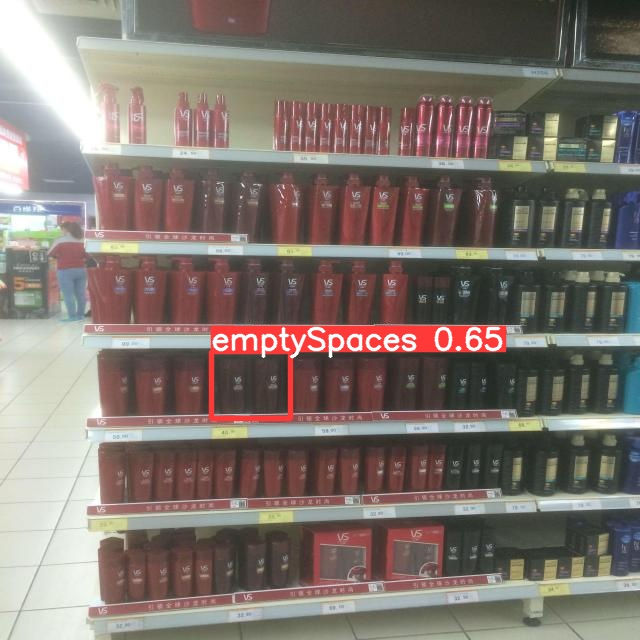

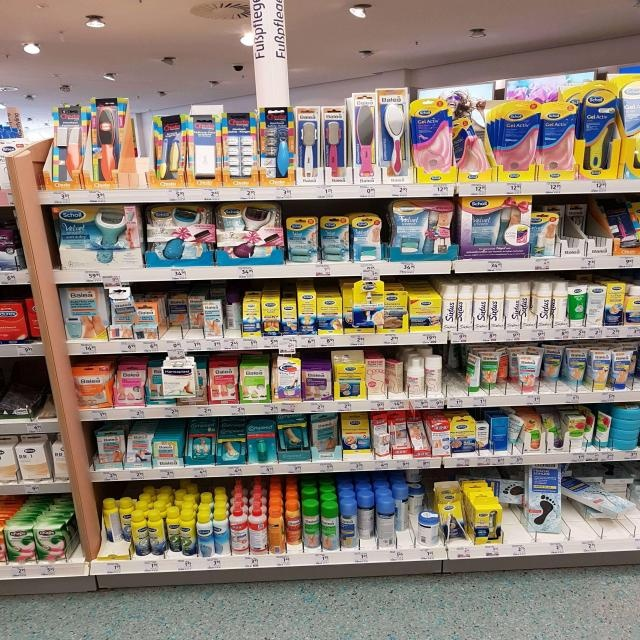

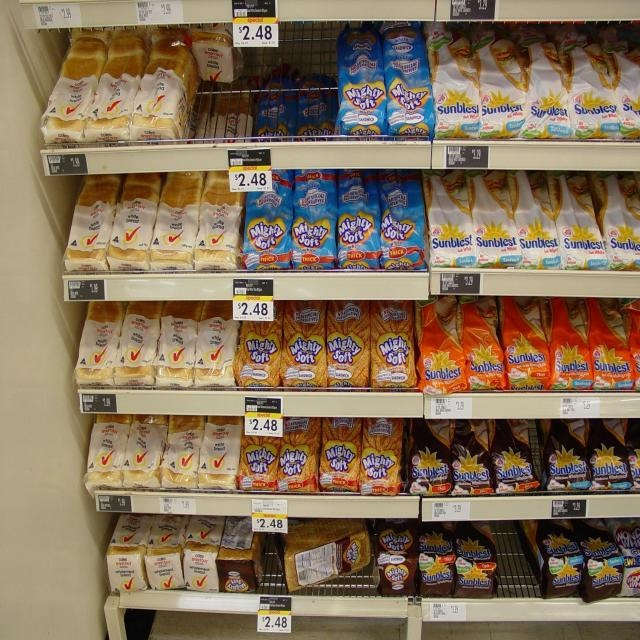

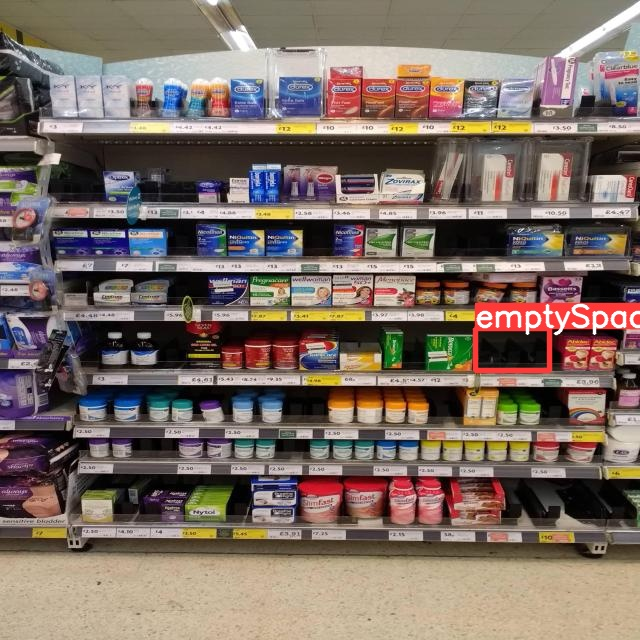

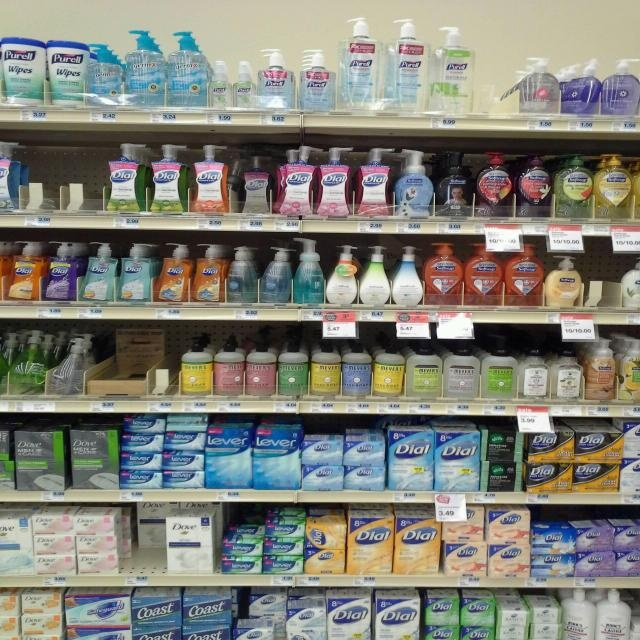

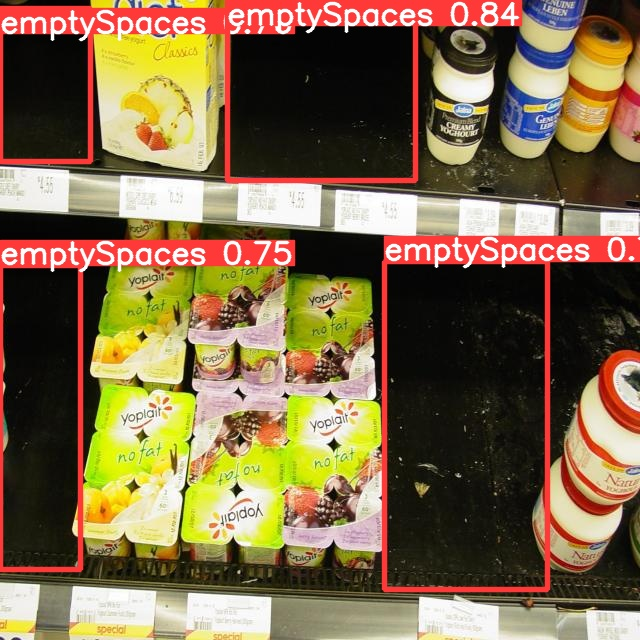

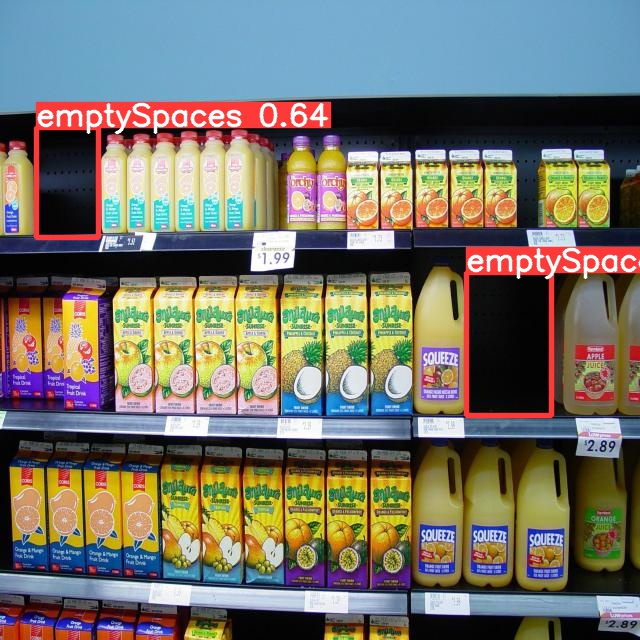

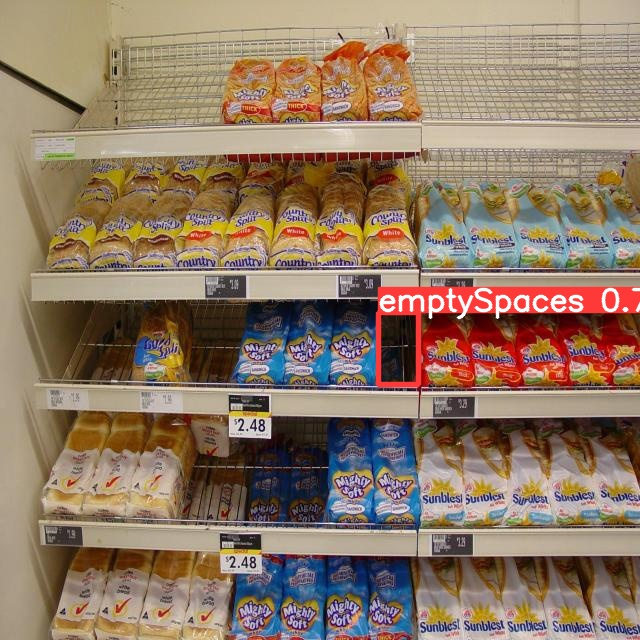

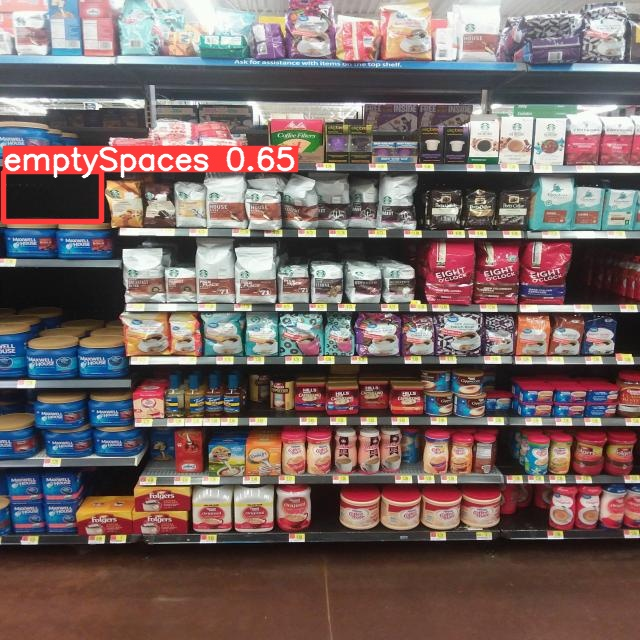

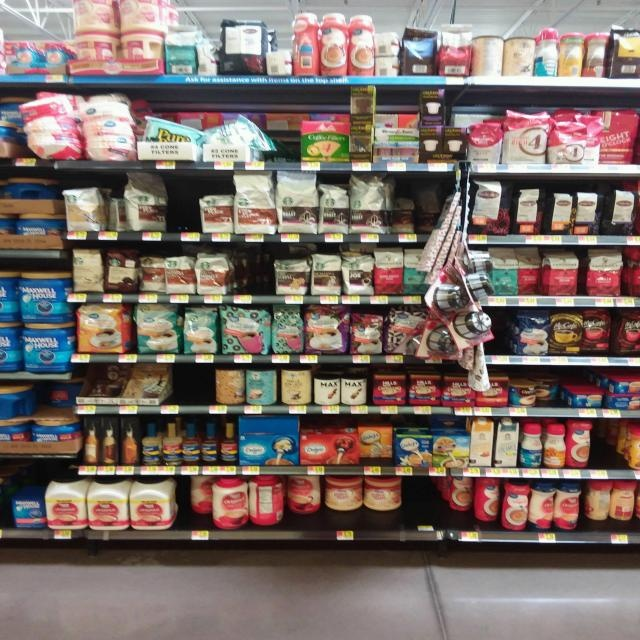

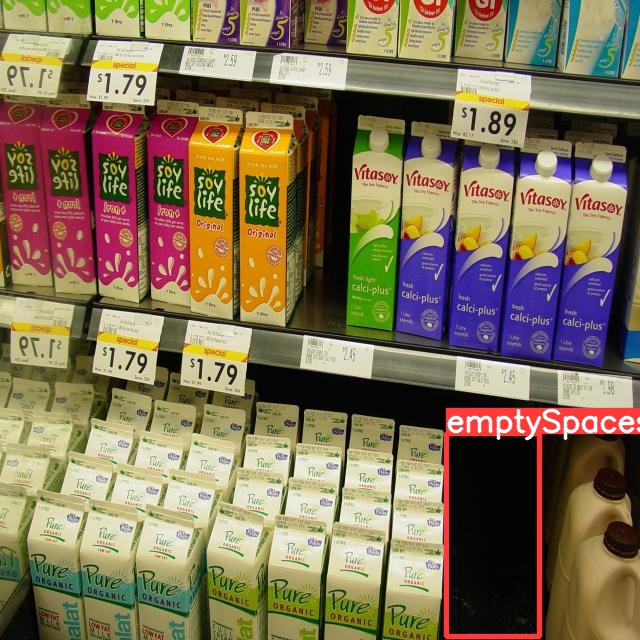

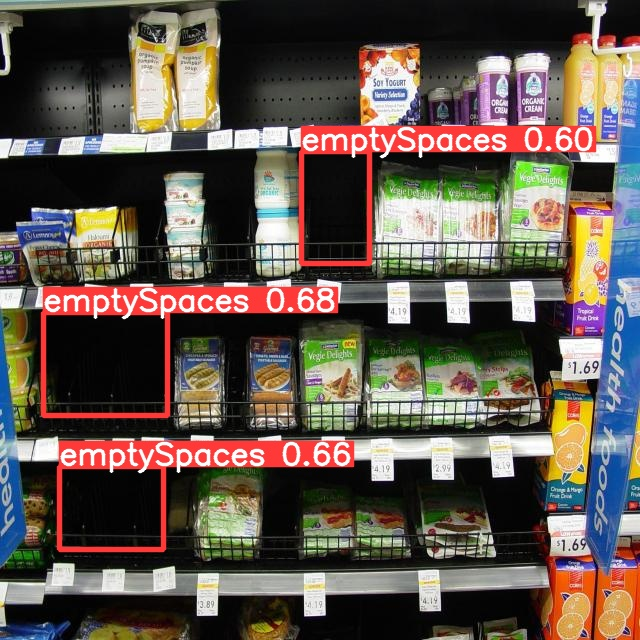

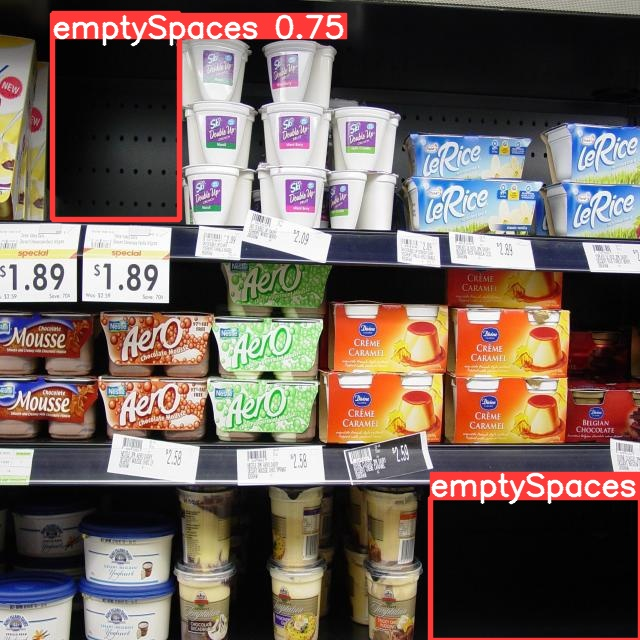

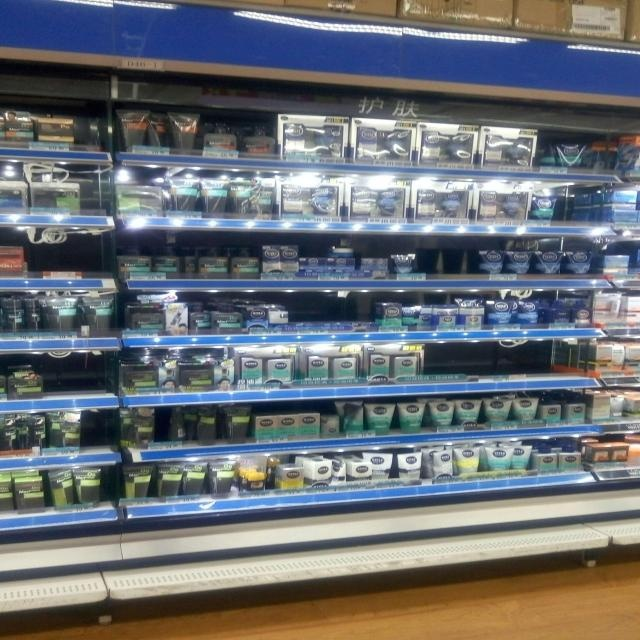

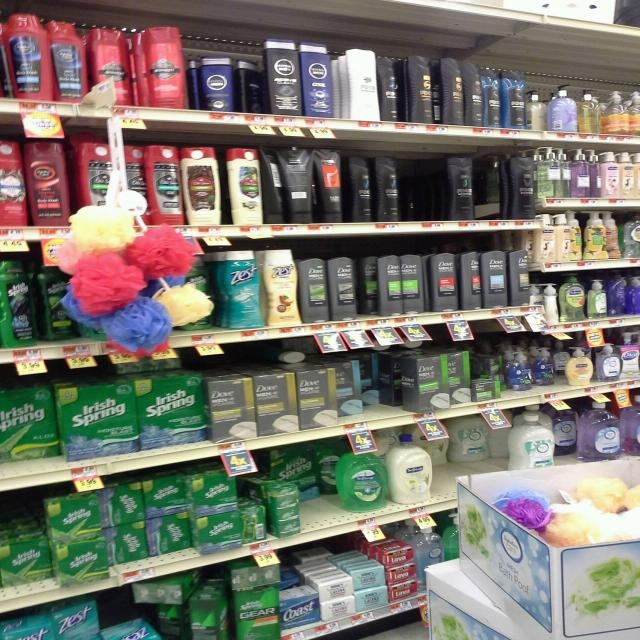

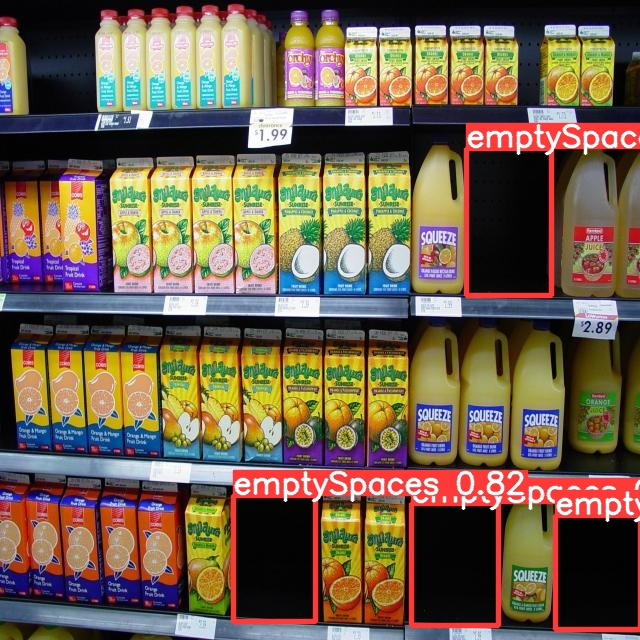

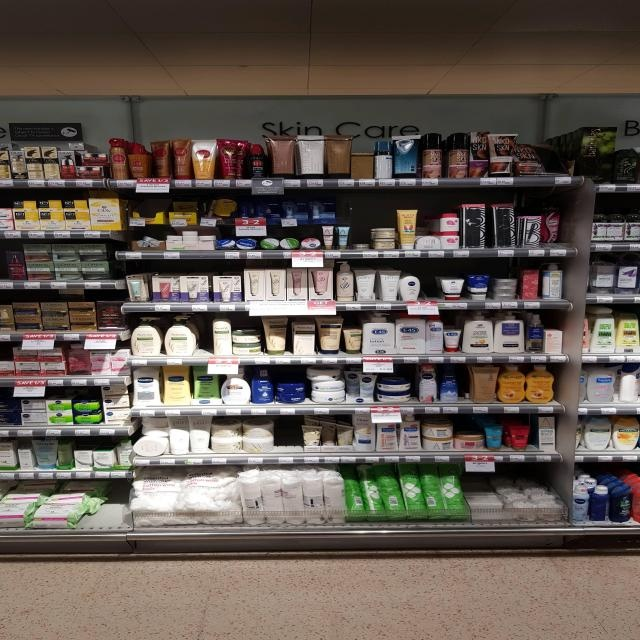

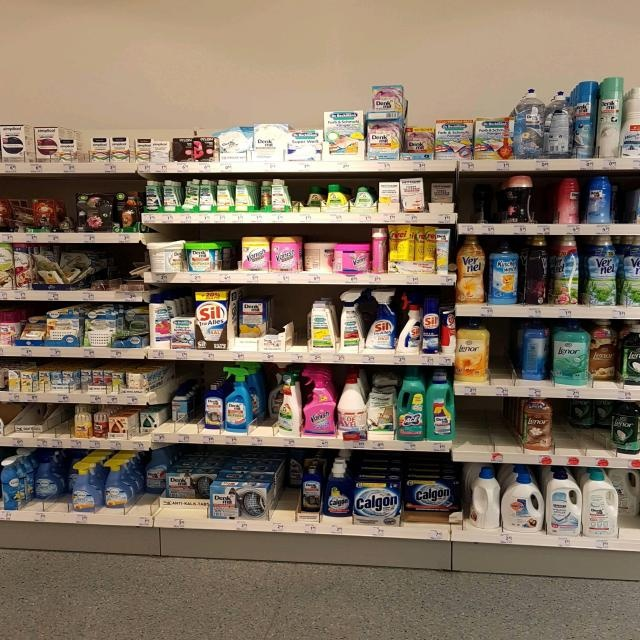

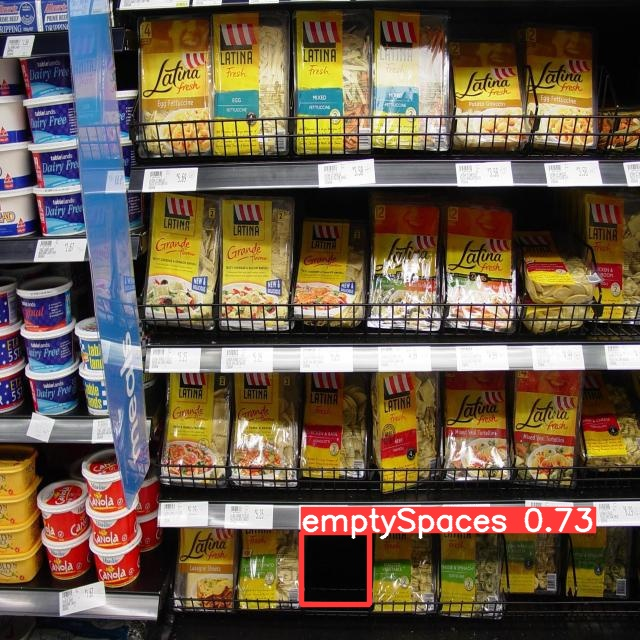

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg'):
  display(Image(filename=image_path, width=600))
  print("\n")


In [ ]:
  print(f"Number of predicted images: {len(image_path)}\n")

Number of predicted images: 109



In [ ]:
!pip install twilio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 29.3 MB/s eta 0:00:00


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from twilio.rest import Client
from ultralytics import YOLO
import glob
HOME = os.getcwd()

In [ ]:
def alert_system(detected_image_path, empty_space_detected):
    """
    This function triggers an alert if an empty space is detected.
    If `empty_space_detected` is True, an alert message is displayed and an SMS is sent.
    """
    if empty_space_detected:
        print("ALERT: Empty space detected on the shelf! Restock needed.")
        auth_token = '_______________'
        client = Client('_____________', auth_token)

        message = client.messages.create(
            body="Empty space in shelf detected, Please refill the shelf immediately!.",
            from_='your twillio number',
            to='recievers number'
        )

        print(f"SMS Alert Sent! SID: {message.sid}")
    else:
        print("No empty space detected. No alert needed.")


# Adjust this to check for empty space predictions from YOLO
def check_empty_space_predictions(results):
    """
    Analyze the prediction results from YOLO to detect empty spaces.
    Returns True if an empty space is found, False otherwise.
    """
    for result in results.boxes.data.tolist():
        label = int(result[5])
        if label == 0:
            return True
    return False


# Running YOLO inference and triggering alert
model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')
image_paths = glob.glob(f'{HOME}/runs/detect/test/images/*.jpg')

for img_path in image_paths:
    # Run prediction on each image
    results = model(img_path)

    # Check for empty spaces and trigger the alert system
    empty_space_detected = check_empty_space_predictions(results[0])
    alert_system(img_path, empty_space_detected)


You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


In [ ]:
from twilio.rest import Client

account_sid = '___'
auth_token = '___'
client = Client(account_sid, auth_token)

message = client.messages.create(
  from_='___',
  body='Empty space in shelf detected, Please refill the shelf immediately!',
  to='___'
)

print(message.sid)

SMbb7630b2c22b7683147fa12aefb18c2b


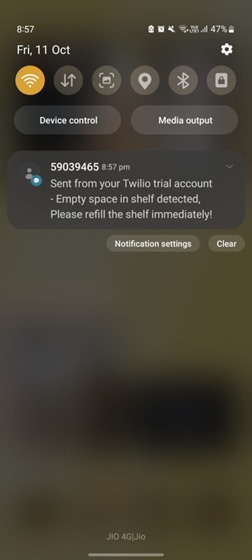

**USER INPUTS FOR EMPTY SPACE DETECTION**

In [ ]:
!pip install ultralytics
!pip install matplotlib
!pip install pillow

import os
import cv2
import torch
import matplotlib.pyplot as plt
from google.colab import files
from ultralytics import YOLO
from PIL import Image as PILImage, ImageDraw, ImageFont

In [ ]:
# Loading trained YOLOv8 model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Uploading an image from the user side
uploaded = files.upload()

# Get the uploaded file name
image_name = list(uploaded.keys())[0]

# Load and predict on the uploaded image
results = model(image_name)

# Get the original image and convert it to PIL for drawing
img = PILImage.open(image_name)

# Draw bounding boxes on the image
draw = ImageDraw.Draw(img)
font = ImageFont.load_default()

# Get the bounding boxes and labels from results
boxes = results[0].boxes
for box in boxes:
    # Coordinates of bounding box
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    label = box.cls.item()
    confidence = box.conf.item()

    class_name = 'empty-spaces' if label == 1 else 'background'

    # Draw rectangle and add label
    draw.rectangle([x1, y1, x2, y2], outline="red", width=2)
    draw.text((x1, y1), f'{label}', fill="white")

# Save and display the output image
output_image_path = f'predicted_{image_name}'
img.save(output_image_path)

# Display the output image with bounding boxes
img.show()

# Displaying directly in the notebook
img = cv2.imread(output_image_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
